#data filteration

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as stat

In [ ]:
df=pd.read_csv("Suicides in India 2001-2012.csv")
df

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0
...,...,...,...,...,...,...,...
194146,Rajasthan,2009,Professional_Profile,Professional Activity,Female,15-29,0
194147,Rajasthan,2009,Professional_Profile,Others (Please Specify),Female,15-29,67
194148,Rajasthan,2009,Professional_Profile,Retired Person,Female,15-29,0
194149,Rajasthan,2009,Professional_Profile,Service (Government),Female,15-29,7


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194151 entries, 0 to 194150
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   State      194151 non-null  object
 1   Year       194151 non-null  int64 
 2   Type_code  194151 non-null  object
 3   Type       194151 non-null  object
 4   Gender     194151 non-null  object
 5   Age_group  194151 non-null  object
 6   Total      194151 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 10.4+ MB


In [ ]:
df['State'].unique()

array(['A & N Islands', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam',
       'Bihar', 'Chandigarh', 'Chhattisgarh', 'D & N Haveli',
       'Daman & Diu', 'Delhi (Ut)', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Lakshadweep', 'Madhya Pradesh', 'Maharashtra',
       'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha',
       'Puducherry', 'Punjab', 'Rajasthan'], dtype=object)

In [ ]:
df.replace('A & N Islands (Ut)','A & N Islands',inplace=True)
df.replace('Chandigarh (Ut)','Chandigarh',inplace=True)
df.replace('D & N Haveli (Ut)','D & N Haveli',inplace=True)
df.replace('Daman & Diu (Ut)','Daman & Diu',inplace=True)
df.replace('Lakshadweep (Ut)','Lakshadweep',inplace=True)
df.replace('Delhi (Ut)','Delhi',inplace=True)
df.replace('Bankruptcy or Sudden change in Econamics','Bankruptcy or Sudden change in Econamics Status',inplace=True)
df.replace('By Other means (please specify)','By other means',inplace=True)
df.replace('Not having Children(Barrenness/Impotency','Not having Children',inplace=True)
df = df.drop(df[(df.State == 'Total (Uts)') | (df.State == 'Total (All India)') | (df.State == 'Total (States)')].index)
df = df.drop(df[(df.Type == 'By Other means') | (df.Type == 'Other Causes (Please Specify)')].index)

In [ ]:
df

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0
...,...,...,...,...,...,...,...
194146,Rajasthan,2009,Professional_Profile,Professional Activity,Female,15-29,0
194147,Rajasthan,2009,Professional_Profile,Others (Please Specify),Female,15-29,67
194148,Rajasthan,2009,Professional_Profile,Retired Person,Female,15-29,0
194149,Rajasthan,2009,Professional_Profile,Service (Government),Female,15-29,7


# Gender wise cases

          Total
Gender         
Female  1771350
Male    3415984


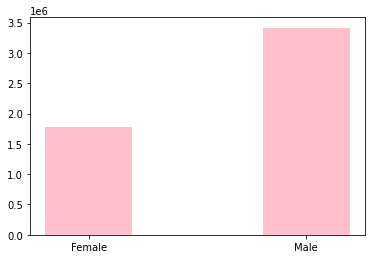

In [ ]:
gen_tot=pd.DataFrame(df.groupby('Gender')['Total'].sum())
print(gen_tot)
plt.bar(df.Gender.unique(),gen_tot['Total'], color ='Pink',width = 0.4)
plt.show()

**hence, it concludes that males attempt more suicide**

# State wise cases

In [ ]:
grp=df.groupby('State')['Total'].sum()
grp

State
A & N Islands          8109
Andhra Pradesh       813500
Arunachal Pradesh      6633
Assam                172050
Bihar                 46079
Chandigarh             5161
Chhattisgarh         301961
D & N Haveli           3430
Daman & Diu            1391
Delhi                 84266
Goa                   17341
Gujarat              330760
Haryana              146821
Himachal Pradesh      26546
Jammu & Kashmir       14786
Jharkhand             49675
Karnataka            733707
Kerala               538904
Lakshadweep              50
Madhya Pradesh       451334
Maharashtra          901943
Manipur                2101
Meghalaya              5405
Mizoram                4154
Nagaland               1718
Odisha               266247
Puducherry            32144
Punjab                46303
Rajasthan            174815
Name: Total, dtype: int64

[Text(0, 0, 'Maharashtra'),
 Text(0, 0, 'Andhra Pradesh'),
 Text(0, 0, 'Karnataka'),
 Text(0, 0, 'Kerala'),
 Text(0, 0, 'Madhya Pradesh'),
 Text(0, 0, 'Gujarat'),
 Text(0, 0, 'Chhattisgarh'),
 Text(0, 0, 'Odisha'),
 Text(0, 0, 'Rajasthan'),
 Text(0, 0, 'Assam'),
 Text(0, 0, 'Haryana'),
 Text(0, 0, 'Delhi'),
 Text(0, 0, 'Jharkhand'),
 Text(0, 0, 'Punjab'),
 Text(0, 0, 'Bihar'),
 Text(0, 0, 'Puducherry'),
 Text(0, 0, 'Himachal Pradesh'),
 Text(0, 0, 'Goa'),
 Text(0, 0, 'Jammu & Kashmir'),
 Text(0, 0, 'A & N Islands'),
 Text(0, 0, 'Arunachal Pradesh'),
 Text(0, 0, 'Meghalaya'),
 Text(0, 0, 'Chandigarh'),
 Text(0, 0, 'Mizoram'),
 Text(0, 0, 'D & N Haveli'),
 Text(0, 0, 'Manipur'),
 Text(0, 0, 'Nagaland'),
 Text(0, 0, 'Daman & Diu'),
 Text(0, 0, 'Lakshadweep')]

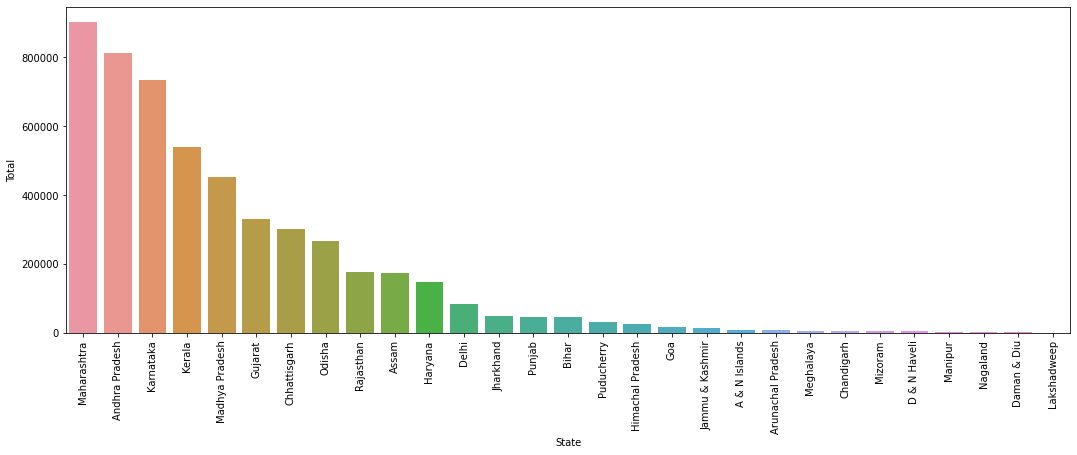

In [ ]:
import matplotlib.pyplot as plt
grp=df.groupby('State')['Total'].sum()
total_suicides=pd.DataFrame(grp).reset_index().sort_values('Total',ascending=False)
fig , ax =plt.subplots(figsize=(18,6))
g=sns.barplot(x='State',y='Total',data=total_suicides)
g.set_xticklabels(g.get_xticklabels(),rotation=90)

hence, it concludes through graph that **MAHARASTRA** have highest suicide rate nd lowest **LAKSHDWEEP**

# Year wise overall cases

Empty DataFrame
Columns: [Year, Total]
Index: []


ValueError: ignored

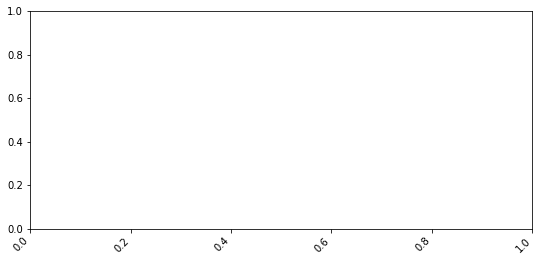

In [ ]:
indiaOverall = df[(df['Type_code']=='Education_Status') & (df['State']=='Total (All India)')]
overall = indiaOverall.groupby(['Year'],as_index=False).sum()
print(overall)
plt.figure(figsize=(9,4))
plt.xticks(rotation=45,ha='right')
sns.barplot(x='Year',y='Total',data=overall,palette='viridis').set_title('Suicides in India overall')
plt.tight_layout()

The total number of suicides in the conutry are increasing with time. From 2001 to 2012 the percentage increase in suicides is 24.8% which is very scary

hence, this shows that YEAR 2011 have hight suicide rate

# **total no of suicide in a particular state due to a particular type_code**

In [ ]:

Type_code_menu=df['Type_code'].unique()
state_menu=df['State'].unique()
print(Type_code_menu)
print(state_menu)
ty_co=input("Enter the type_code")
state=input("Enter the state: ")
data=df[df['State']==state]
typ_c = data[data['Type_code'] == ty_co]
typ_c

In [ ]:
typ_c

In [ ]:
year_count=pd.DataFrame(typ_c.groupby('Year')['Total'].sum())
year_count

In [ ]:
year_count.Total.mean()

In [ ]:
plt.bar(df.Year.unique(),year_count['Total'], color ='maroon',width = 0.4)

#  **year wise suicide in a particular state due to particular type**

In [ ]:
Type_menu=df['Type'].unique()
state_menu=df['State'].unique()
print(Type_menu)
print(state_menu)
ty=input()
state=input("Enter the state: ")
data=df[df['State']==state]
typ = data[data['Type'] == ty]
typ

In [ ]:
year_c=pd.DataFrame(typ.groupby('Year')['Total'].sum())

In [ ]:
year_c.Total.mean()

In [ ]:
plt.bar(df.Year.unique(),year_c['Total'], color ='Green',width = 0.4)

# **Year wise suicide in a perticular state by age-group**

In [ ]:
agegrp_menu=df['Age_group'].unique()
state_menu=df['State'].unique()
print(agegrp_menu)
print(state_menu)
ag=input()
state=input("Enter the state: ")
data=df[df['State']==state]
ag_gp = data[data['Age_group'] == ag]
ag_gp

In [ ]:
ag_data=pd.DataFrame(typ.groupby('Year')['Total'].sum())

In [ ]:
ag_data.Total.mean()

In [ ]:
plt.bar(df.Year.unique(),ag_data['Total'], color ='Black',width = 0.4)

# **if a suicide happen what is the prob of that happening in an particular state**

In [ ]:
total_sum = df['Total'].sum()
total_sum

In [ ]:
state_menu = df['State'].unique()
print(state_menu,"\n")
user_state = input("Enter the state whose suicide you want to calculate: ")
state_wise = df.loc[df['State'] == user_state, 'Total'].sum()
state_wise
print("\nThe probability of the state",user_state," is: ",(state_wise/total_sum))
print("\nThe percent in",user_state," is: ",(state_wise/total_sum)*100)

# **if a suicide happen in an perticular state then what is the prob of that happening due to a perticular Type:**

In [ ]:
state_menu = df['State'].unique()
print(state_menu,"\n")
state = input("Enter the state: ")
cause_menu = df['Type'].unique()
print("\n",cause_menu,"\n")
cause = input("Enter the cause type: ")
df_state = df[df['State'] == state]
state_sum = df_state.loc[df_state['State'] == state, 'Total'].sum()
df_cause = df_state[df_state['Type'] == cause]
cause_sum = df_cause.loc[df_cause['Type'] == cause, 'Total'].sum()
print("\nThe probability of suicide due to cause type:-",cause," in ",state," is: ",(cause_sum/state_sum))
print("\nThe percent in above case is: ",(cause_sum/state_sum)*100,"%")

# **Dataset of particular age group with there year, type and state**

In [ ]:
Type_menu=df['Type'].unique()
print(Type_menu)
print("\n")
T = input("Enter the type of cause: ")
print("\n\n")
age_menu=df['Age_group'].unique()
print(age_menu)
print("\n")
A = input("Enter the age_group: ")
print("\n\n")
state_menu=df['State'].unique()
print(state_menu)
print("\n")
S = input("Enter the State: ")
d1 = pd.DataFrame(df[df['Type'] == T])
d2=pd.DataFrame(d1[d1['Age_group']==A])
d3=d2[d2['State']==S]
d3

In [ ]:
Gayu=pd.DataFrame(d3.groupby('Year')['Total'].sum())
plt.plot(df.Year.unique(),Gayu['Total'])
gen_t=pd.DataFrame(d3.groupby('Gender')['Total'].sum())
print(gen_t)
plt.show()

In [ ]:
Type_code_menu=df['Type_code'].unique()
print(Type_code_menu)
print("\n")
T = input("Enter the type of cause: ")
print("\n\n")
age_menu=df['Age_group'].unique()
print(age_menu)
print("\n")
A = input("Enter the age_group: ")
print("\n\n")
state_menu=df['State'].unique()
print(state_menu)
print("\n")
S = input("Enter the State: ")
d1 = pd.DataFrame(df[df['Type_code'] == T])
d2=pd.DataFrame(d1[d1['Age_group']==A])
d3=d2[d2['State']==S]
d3

In [ ]:
Gayu=pd.DataFrame(d3.groupby('Year')['Total'].sum())
plt.plot(df.Year.unique(),Gayu['Total'])
gen_t=pd.DataFrame(d3.groupby('Gender')['Total'].sum())
print(gen_t)
plt.show()

In [ ]:
eduDf = df[df['Type_code']=='Education_Status']
causesDf = df[df['Type_code']=='Causes']
meansDf = df[df['Type_code']=='Means_adopted']
profDf = df[df['Type_code']=='Professional_Profile']
socialDf = df[df['Type_code']=='Social_Status']

In [ ]:
plt.figure(figsize=(12,6))
eduDf = eduDf[['Type','Gender','Total']]
edSort = eduDf.groupby(['Type','Gender'],as_index=False).sum().sort_values('Total',ascending=False)
sns.barplot(x='Type',y='Total',hue='Gender',data=edSort,palette='viridis')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()


Number of suicides appear to be concentrated towards Lower education level. Most of the people who have committed suicides have education level below Matriculate/Secondary.

In [ ]:
plt.figure(figsize=(9,6))
socialDf = socialDf[['Type','Gender','Total']]
socialSort = socialDf.groupby(['Type','Gender'],as_index=False).sum().sort_values('Total',ascending=False)
sns.barplot(x='Type',y='Total',data=socialSort,hue='Gender',palette='viridis')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()

In [ ]:
causesDf.is_copy = False
causesDf.loc[causesDf['Type']=='Bankruptcy or Sudden change in Economic','Type'] = 'Change in Economic Status'
causesDf.loc[causesDf['Type']=='Bankruptcy or Sudden change in Economic Status','Type'] = 'Change in Economic Status'
causesDf.loc[causesDf['Type']=='Other Causes (Please Specity)','Type'] = 'Causes Not known'
causesDf.loc[causesDf['Type']=='Not having Children (Barrenness/Impotency','Type'] = 'Not having Children(Barrenness/Impotency'
plt.figure(figsize=(12,6))
causesDf = causesDf[['Type','Gender','Total']]
causesSort = causesDf.groupby(['Type','Gender'],as_index=False).sum().sort_values('Total',ascending=False)
sns.barplot(x='Type',y='Total',data=causesSort,hue='Gender',palette='viridis')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()

While most of the causes of the suicides are not known, the three major causes among the known cases are Family problems, Prolonged illness and mental illness.

According to the data men seem to be badly effected by unemployment, property dispute, poverty,drug abuse or addiction and change in economic status than women.

Number of women who have committed suicides due to dowry disputes is much higher when compared to men,

In [ ]:
plt.figure(figsize=(12,6))
profDf = profDf[['Type','Gender','Total']]
profSort = profDf.groupby(['Type','Gender'],as_index=False).sum().sort_values('Total',ascending=False)
sns.barplot(x='Type',y='Total',data=profSort,hue='Gender',palette='viridis')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()

According to the data, most of the females who have committed suicides are house wives. The percentage of female suicides in all other categories is much lower than the percentage of male suicides. While this is an indication of lower representation by women in professional careers, it also reiterates the importance of girl education and women empowerment. The graph shows that financially independent women are much mentally stronger.
It is disheartening to see that farmers who feed the rest of the country are the ones who are more committing suicides than any other profession. Followed by farmers, it's the unemployed and private sector employees who are most effected. It's surprising to know that the number of suicides among the unemployed and the private sector employees is almost the same. This also might be due to higher pressure in private sector when compared to government sector jobs.

In [ ]:
causes = df[df['Type_code']=='Causes']
causesGrp = causes.groupby(['State','Age_group'],as_index=False).sum()
causesGrpPvt = causesGrp.pivot(index='Age_group',columns='State',values='Total')
plt.figure(figsize=(14,6))
plt.xticks(rotation=45,ha='right')
sns.heatmap(causesGrpPvt,cmap='YlGnBu')
plt.tight_layout()

This plot gives us an insight on the number of suicides, based on state and age group. As we can see 15-29 is the most vulnerable age in all states except Kerala. **Maharashtra is the state with most number of suicides**.Number of suicides per square kilometre might give us some more information on this.

In [ ]:
edu = df[df['Type_code']=='Education_Status']
plt.figure(figsize=(12,6))
st = edu.groupby(['State','Gender'],as_index=False).sum().sort_values('Total',ascending=False)
st = st[(st['State']!='Total (States)') & (st['State']!='Total (All India)') & (st['State']!='Total (Uts)')]

statesArea = {'Maharashtra':307713,'West Bengal':88752,'Tamil Nadu':130058,'Andhra Pradesh':275045,'Karnataka':191791,'Kerala':38863,'Madhya Pradesh':308350,'Gujarat':196024,'Chhattisgarh':135191,'Odisha':155707,'Rajasthan':342239,'Uttar Pradesh':243290,'Assam':78438,'Haryana':44212,'Delhi (Ut)':1484,'Jharkhand':79714,'Punjab':50362,'Bihar':94163,'Tripura':10486,'Puducherry':562,'Himachal Pradesh':55673,'Uttarakhand':53483,'Goa':3702,'Jammu & Kashmir':222236,'Sikkim':7096,'A & N Islands':8249,'Arunachal Pradesh':83743,'Meghalaya':22429,'Chandigarh':114,'Mizoram':21081,'D & N Haveli':491,'Manipur':22327,'Nagaland':16579,'Daman & Diu':112,'Lakshadweep':32}
for state in statesArea.keys():
    st.loc[st['State']==state,'Area'] = statesArea[state]
st['Suicides_per_squareKm'] = st['Total']/st['Area']
sortedStates = st.sort_values('Suicides_per_squareKm',ascending=False)
sns.barplot(x='State',y='Suicides_per_squareKm',data=sortedStates,hue='Gender',palette='viridis')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()


Union territories whose area is much smaller compared other states have higher number of suicides per square kilometre. Again, Kerala is an exception here as it larger compared all other union territories. Kerala is followed by West Bengal and Tamil Nadu among the Indian states to register higher number of suicides.

In [ ]:
Type_menu = df['Type'].unique()
print(Type_menu,"\n")
labels = tuple(Type_menu)
#sizes = [15, 30, 45, 10]

s = input("Enter the state: ")
d1 = df[df['State'] == s]
d2 = d1.groupby(df['Type']).sum()
#d2.drop(labels=['Year'], axis=1)
sizes = d2['Total']

fig1, ax1 = plt.subplots(figsize=(10, 15))
#ax1.pie(sizes, labels=labels)

patches, texts = plt.pie(sizes, shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
ax1.axis('equal')
plt.show()

In [ ]:
Type_menu = df['Type'].unique()
print(Type_menu,"\n")
labels = tuple(Type_menu)

s = input("Enter the state: ")
d1 = df[df['State'] == s]
d2 = d1.groupby(df['Type']).sum()

sizes = d2['Total']

fig1, ax1 = plt.subplots(figsize=(10, 15))

patches, texts = plt.pie(sizes, shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
ax1.axis('equal')
plt.show()

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(30, 30))
Age_menu=df['Age_group'].unique()
for i in range(3):
  for j in range(2):
    d_s=df[df['State']=='A & N Islands']
    grp=pd.DataFrame(d_s.groupby('Age_group')['Total'].sum())
    axes[i,j].set_title("suicide in A & N Islands in 2001-2014")
    axes[i,j].bar(df.Age_group.unique(), grp.Total, color = 'black');
    plt.xlabel('Age_group')
    plt.ylabel('Number of Suicides')


In [ ]:
df['Age_group'].unique()

array(['0-14', '15-29', '30-44', '45-59', '60+', '0-100+'], dtype=object)

In [ ]:
df['Type'].unique()

array(['Illness (Aids/STD)', 'Bankruptcy or Sudden change in Economic',
       'Cancellation/Non-Settlement of Marriage',
       'Physical Abuse (Rape/Incest Etc.)', 'Dowry Dispute',
       'Family Problems', 'Ideological Causes/Hero Worshipping',
       'Other Prolonged Illness', 'Property Dispute',
       'Fall in Social Reputation', 'Illegitimate Pregnancy',
       'Failure in Examination', 'Insanity/Mental Illness',
       'Love Affairs', 'Professional/Career Problem', 'Divorce',
       'Drug Abuse/Addiction', 'Not having Children', 'Causes Not known',
       'Unemployment', 'Other Causes (Please Specity)', 'Poverty',
       'Death of Dear Person', 'Cancer', 'Suspected/Illicit Relation',
       'Paralysis', 'Diploma', 'No Education', 'Post Graduate and Above',
       'Middle', 'Graduate', 'Hr. Secondary/Intermediate/Pre-Universit',
       'Primary', 'Matriculate/Secondary', 'By Consuming Insecticides',
       'By Hanging', 'By Jumping from (Other sites)',
       'By touching electr

In [ ]:
df['Age_group'].unique()

array(['0-14', '15-29', '30-44', '45-59', '60+', '0-100+'], dtype=object)

ValueError: ignored

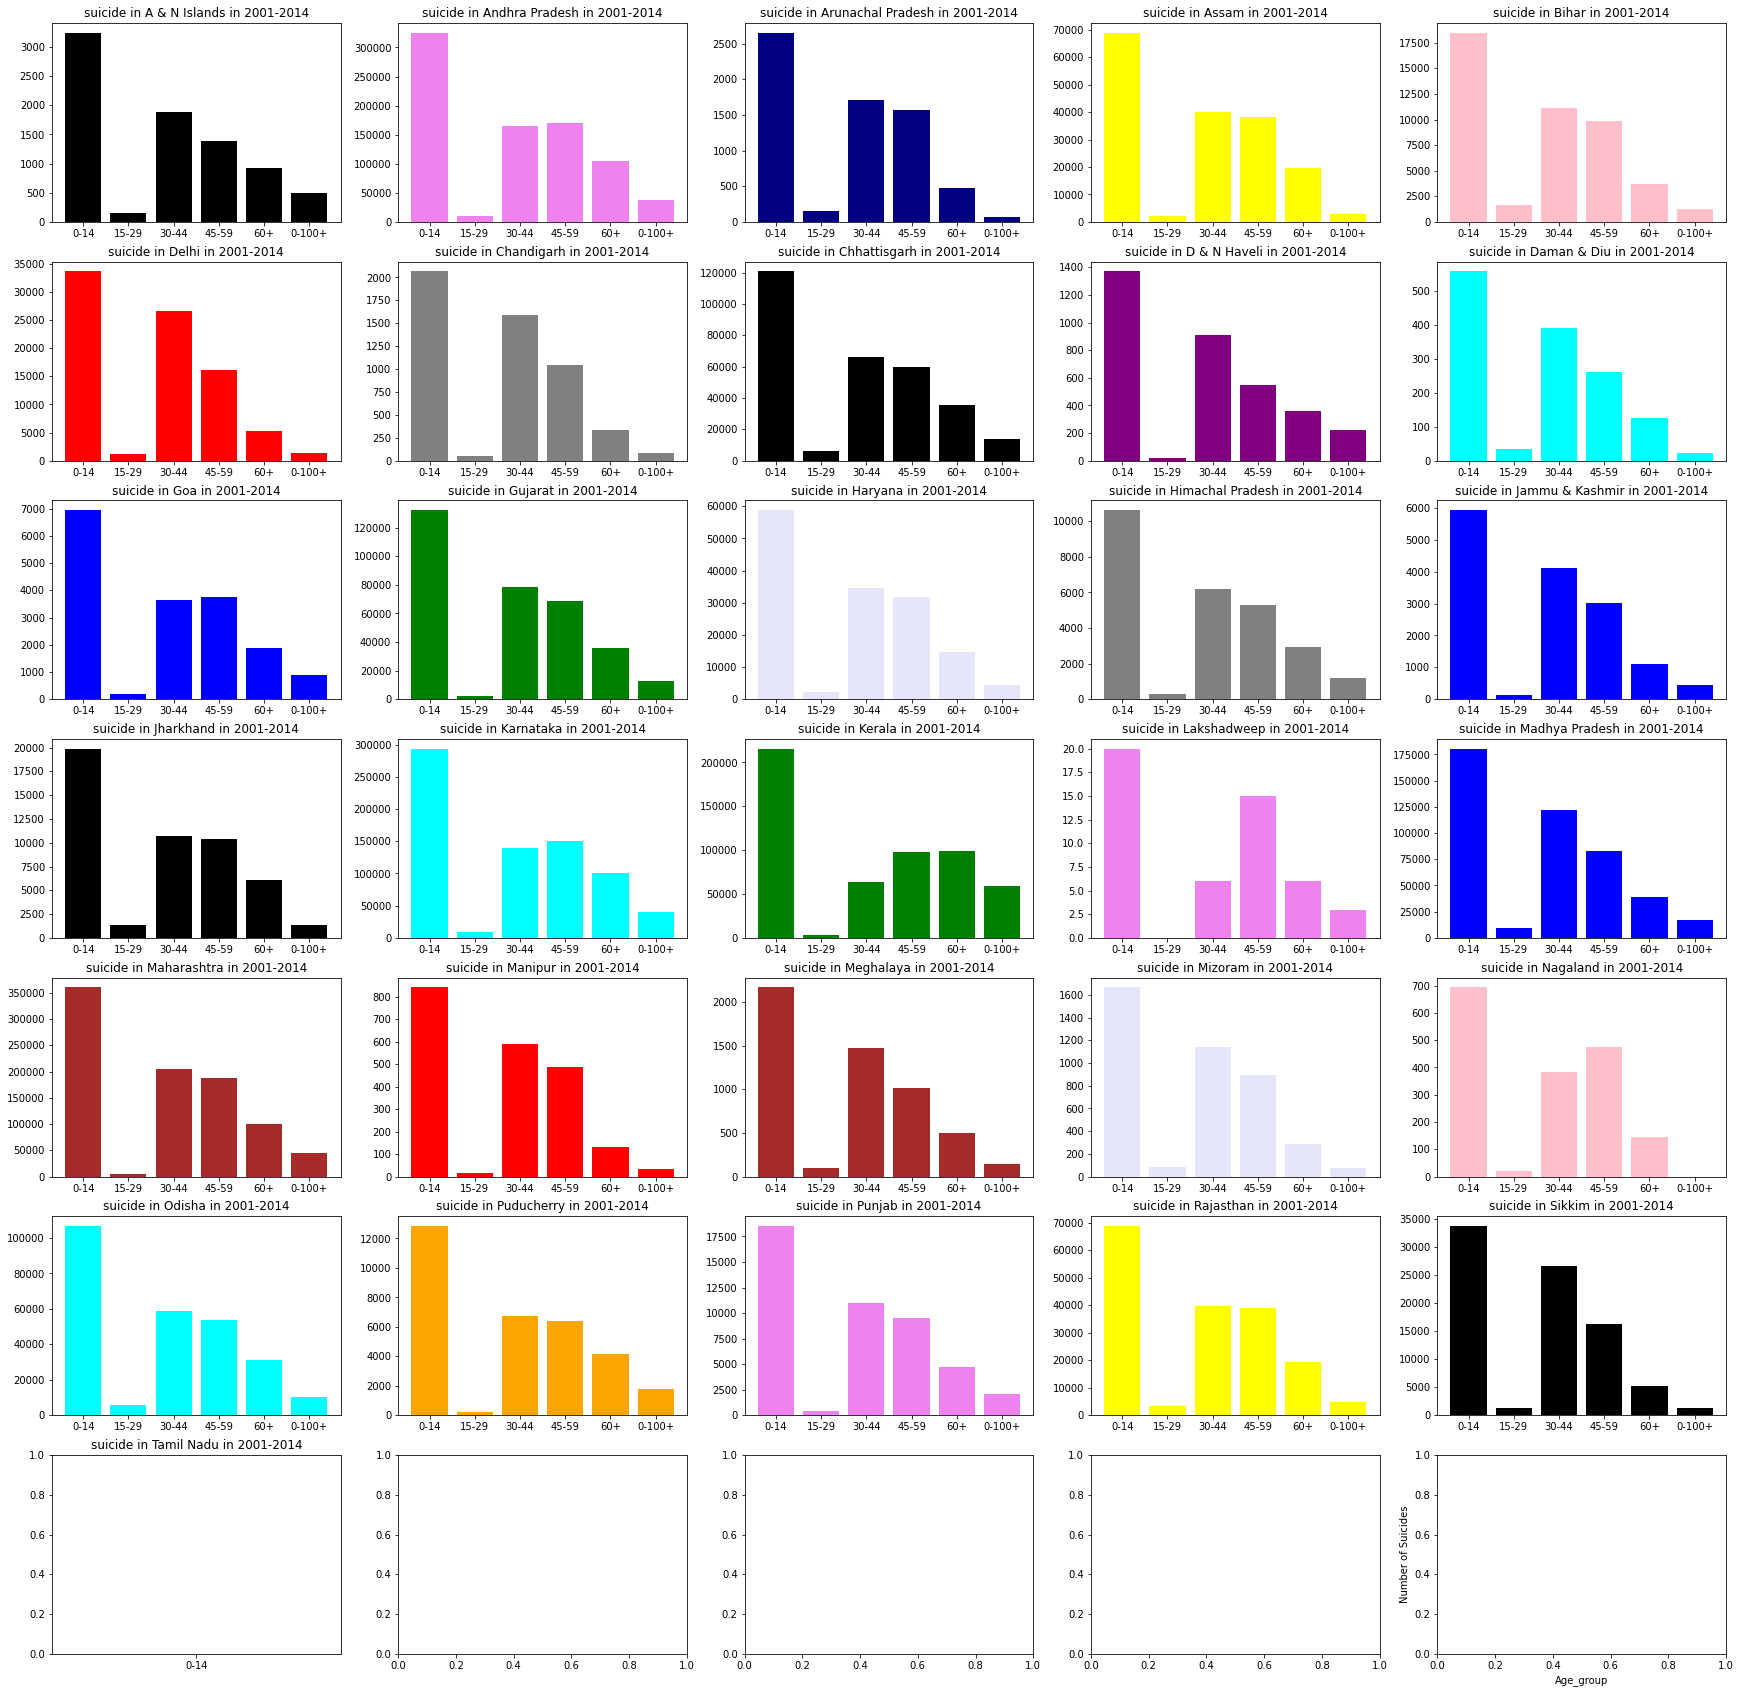

In [ ]:
fig, axes = plt.subplots(7, 5, figsize=(30, 30))

d_s=df[df['State']=='A & N Islands']
grp=pd.DataFrame(d_s.groupby('Age_group')['Total'].sum())
axes[0,0].set_title("suicide in A & N Islands in 2001-2014")
axes[0,0].bar(df.Age_group.unique(), grp.Total, color = 'black');
plt.xlabel('Age_group') #X-axis
plt.ylabel('Number of Suicides') #Y-axis

d_s=df[df['State']=='Andhra Pradesh']
grp=pd.DataFrame(d_s.groupby('Age_group')['Total'].sum())
axes[0,1].set_title("suicide in Andhra Pradesh in 2001-2014")
axes[0,1].bar(df.Age_group.unique(), grp.Total, color = 'violet');
plt.xlabel('Age_group') #X-axis
plt.ylabel('Number of Suicides') #Y-axis

d_s=df[df['State']=='Arunachal Pradesh']
grp=pd.DataFrame(d_s.groupby('Age_group')['Total'].sum())
axes[0,2].set_title("suicide in Arunachal Pradesh in 2001-2014")
axes[0,2].bar(df.Age_group.unique(), grp.Total, color = 'navy');
plt.xlabel('Age_group') #X-axis
plt.ylabel('Number of Suicides') #Y-axis

d_s=df[df['State']=='Assam']
grp=pd.DataFrame(d_s.groupby('Age_group')['Total'].sum())
axes[0,3].set_title("suicide in Assam in 2001-2014")
axes[0,3].bar(df.Age_group.unique(), grp.Total, color = 'yellow');
plt.xlabel('Age_group') #X-axis
plt.ylabel('Number of Suicides') #Y-axis

d_s=df[df['State']=='Bihar']
grp=pd.DataFrame(d_s.groupby('Age_group')['Total'].sum())
axes[0,4].set_title("suicide in Bihar in 2001-2014")
axes[0,4].bar(df.Age_group.unique(), grp.Total, color = 'pink');
plt.xlabel('Age_group') #X-axis
plt.ylabel('Number of Suicides') #Y-axis

d_s=df[df['State']=='Delhi']
grp=pd.DataFrame(d_s.groupby('Age_group')['Total'].sum())
axes[1,0].set_title("suicide in Delhi in 2001-2014")
axes[1,0].bar(df.Age_group.unique(), grp.Total, color = 'red');
plt.xlabel('Age_group') #X-axis
plt.ylabel('Number of Suicides') #Y-axis
d_s=df[df['State']=='Chandigarh']

grp=pd.DataFrame(d_s.groupby('Age_group')['Total'].sum())
axes[1,1].set_title("suicide in Chandigarh in 2001-2014")
axes[1,1].bar(df.Age_group.unique(), grp.Total, color = 'gray');
plt.xlabel('Age_group') #X-axis
plt.ylabel('Number of Suicides') #Y-axis

d_s=df[df['State']=='Chhattisgarh']
grp=pd.DataFrame(d_s.groupby('Age_group')['Total'].sum())
axes[1,2].set_title("suicide in Chhattisgarh in 2001-2014")
axes[1,2].bar(df.Age_group.unique(), grp.Total, color = 'black');
plt.xlabel('Age_group') #X-axis
plt.ylabel('Number of Suicides') #Y-axis

d_s=df[df['State']=='D & N Haveli']
grp=pd.DataFrame(d_s.groupby('Age_group')['Total'].sum())
axes[1,3].set_title("suicide in D & N Haveli in 2001-2014")
axes[1,3].bar(df.Age_group.unique(), grp.Total, color = 'purple');
plt.xlabel('Age_group') #X-axis
plt.ylabel('Number of Suicides') #Y-axis

d_s=df[df['State']=='Daman & Diu']
grp=pd.DataFrame(d_s.groupby('Age_group')['Total'].sum())
axes[1,4].set_title("suicide in Daman & Diu in 2001-2014")
axes[1,4].bar(df.Age_group.unique(), grp.Total, color = 'cyan');
plt.xlabel('Age_group') #X-axis
plt.ylabel('Number of Suicides') #Y-axis




d_s=df[df['State']=='Goa']
grp=pd.DataFrame(d_s.groupby('Age_group')['Total'].sum())
axes[2,0].set_title("suicide in Goa in 2001-2014")
axes[2,0].bar(df.Age_group.unique(), grp.Total, color = 'blue');
plt.xlabel('Age_group') #X-axis
plt.ylabel('Number of Suicides') #Y-axis

d_s=df[df['State']=='Gujarat']
grp=pd.DataFrame(d_s.groupby('Age_group')['Total'].sum())
axes[2,1].set_title("suicide in Gujarat in 2001-2014")
axes[2,1].bar(df.Age_group.unique(), grp.Total, color = 'green');
plt.xlabel('Age_group') #X-axis
plt.ylabel('Number of Suicides') #Y-axis

d_s=df[df['State']=='Haryana']
grp=pd.DataFrame(d_s.groupby('Age_group')['Total'].sum())
axes[2,2].set_title("suicide in Haryana in 2001-2014")
axes[2,2].bar(df.Age_group.unique(), grp.Total, color = 'lavender');
plt.xlabel('Age_group') #X-axis
plt.ylabel('Number of Suicides') #Y-axis

d_s=df[df['State']=='Himachal Pradesh']
grp=pd.DataFrame(d_s.groupby('Age_group')['Total'].sum())
axes[2,3].set_title("suicide in Himachal Pradesh in 2001-2014")
axes[2,3].bar(df.Age_group.unique(), grp.Total, color = 'gray');
plt.xlabel('Age_group') #X-axis
plt.ylabel('Number of Suicides') #Y-axis

d_s=df[df['State']=='Jammu & Kashmir']
grp=pd.DataFrame(d_s.groupby('Age_group')['Total'].sum())
axes[2,4].set_title("suicide in Jammu & Kashmir in 2001-2014")
axes[2,4].bar(df.Age_group.unique(), grp.Total, color = 'blue');
plt.xlabel('Age_group') #X-axis
plt.ylabel('Number of Suicides') #Y-axis

d_s=df[df['State']=='Jharkhand']
grp=pd.DataFrame(d_s.groupby('Age_group')['Total'].sum())
axes[3,0].set_title("suicide in Jharkhand in 2001-2014")
axes[3,0].bar(df.Age_group.unique(), grp.Total, color = 'black');
plt.xlabel('Age_group') #X-axis
plt.ylabel('Number of Suicides') #Y-axis

d_s=df[df['State']=='Karnataka']
grp=pd.DataFrame(d_s.groupby('Age_group')['Total'].sum())
axes[3,1].set_title("suicide in Karnataka in 2001-2014")
axes[3,1].bar(df.Age_group.unique(), grp.Total, color = 'cyan');
plt.xlabel('Age_group') #X-axis
plt.ylabel('Number of Suicides') #Y-axis

d_s=df[df['State']=='Kerala']
grp=pd.DataFrame(d_s.groupby('Age_group')['Total'].sum())
axes[3,2].set_title("suicide in Kerala in 2001-2014")
axes[3,2].bar(df.Age_group.unique(), grp.Total, color = 'green');
plt.xlabel('Age_group') #X-axis
plt.ylabel('Number of Suicides') #Y-axis

d_s=df[df['State']=='Lakshadweep']
grp=pd.DataFrame(d_s.groupby('Age_group')['Total'].sum())
axes[3,3].set_title("suicide in Lakshadweep in 2001-2014")
axes[3,3].bar(df.Age_group.unique(), grp.Total, color = 'violet');
plt.xlabel('Age_group') #X-axis
plt.ylabel('Number of Suicides') #Y-axis

d_s=df[df['State']=='Madhya Pradesh']
grp=pd.DataFrame(d_s.groupby('Age_group')['Total'].sum())
axes[3,4].set_title("suicide in Madhya Pradesh in 2001-2014")
axes[3,4].bar(df.Age_group.unique(), grp.Total, color = 'blue');
plt.xlabel('Age_group') #X-axis
plt.ylabel('Number of Suicides') #Y-axis

d_s=df[df['State']=='Maharashtra']
grp=pd.DataFrame(d_s.groupby('Age_group')['Total'].sum())
axes[4,0].set_title("suicide in Maharashtra in 2001-2014")
axes[4,0].bar(df.Age_group.unique(), grp.Total, color = 'brown');
plt.xlabel('Age_group') #X-axis
plt.ylabel('Number of Suicides') #Y-axis

d_s=df[df['State']=='Manipur']
grp=pd.DataFrame(d_s.groupby('Age_group')['Total'].sum())
axes[4,1].set_title("suicide in Manipur in 2001-2014")
axes[4,1].bar(df.Age_group.unique(), grp.Total, color = 'red');
plt.xlabel('Age_group') #X-axis
plt.ylabel('Number of Suicides') #Y-axis

d_s=df[df['State']=='Meghalaya']
grp=pd.DataFrame(d_s.groupby('Age_group')['Total'].sum())
axes[4,2].set_title("suicide in Meghalaya in 2001-2014")
axes[4,2].bar(df.Age_group.unique(), grp.Total, color = 'brown');
plt.xlabel('Age_group') #X-axis
plt.ylabel('Number of Suicides') #Y-axis

d_s=df[df['State']=='Mizoram']
grp=pd.DataFrame(d_s.groupby('Age_group')['Total'].sum())
axes[4,3].set_title("suicide in Mizoram in 2001-2014")
axes[4,3].bar(df.Age_group.unique(), grp.Total, color = 'lavender');
plt.xlabel('Age_group') #X-axis
plt.ylabel('Number of Suicides') #Y-axis

d_s=df[df['State']=='Nagaland']
grp=pd.DataFrame(d_s.groupby('Age_group')['Total'].sum())
axes[4,4].set_title("suicide in Nagaland in 2001-2014")
axes[4,4].bar(df.Age_group.unique(), grp.Total, color = 'pink');
plt.xlabel('Age_group') #X-axis
plt.ylabel('Number of Suicides') #Y-axis

d_s=df[df['State']=='Odisha']
grp=pd.DataFrame(d_s.groupby('Age_group')['Total'].sum())
axes[5,0].set_title("suicide in Odisha in 2001-2014")
axes[5,0].bar(df.Age_group.unique(), grp.Total, color = 'cyan');
plt.xlabel('Age_group') #X-axis
plt.ylabel('Number of Suicides') #Y-axis

d_s=df[df['State']=='Puducherry']
grp=pd.DataFrame(d_s.groupby('Age_group')['Total'].sum())
axes[5,1].set_title("suicide in Puducherry in 2001-2014")
axes[5,1].bar(df.Age_group.unique(), grp.Total, color = 'orange');
plt.xlabel('Age_group') #X-axis
plt.ylabel('Number of Suicides') #Y-axis

d_s=df[df['State']=='Punjab']
grp=pd.DataFrame(d_s.groupby('Age_group')['Total'].sum())
axes[5,2].set_title("suicide in Punjab in 2001-2014")
axes[5,2].bar(df.Age_group.unique(), grp.Total, color = 'violet');
plt.xlabel('Age_group') #X-axis
plt.ylabel('Number of Suicides') #Y-axis

d_s=df[df['State']=='Rajasthan']
grp=pd.DataFrame(d_s.groupby('Age_group')['Total'].sum())
axes[5,3].set_title("suicide in Rajasthan in 2001-2014")
axes[5,3].bar(df.Age_group.unique(), grp.Total, color = 'yellow');
plt.xlabel('Age_group') #X-axis
plt.ylabel('Number of Suicides') #Y-axis

d_s=df[df['State']=='Delhi']
grp=pd.DataFrame(d_s.groupby('Age_group')['Total'].sum())
axes[5,4].set_title("suicide in Sikkim in 2001-2014")
axes[5,4].bar(df.Age_group.unique(), grp.Total, color = 'black');
plt.xlabel('Age_group') #X-axis
plt.ylabel('Number of Suicides') #Y-axis

d_s=df[df['State']=='Tamil Nadu']
grp=pd.DataFrame(d_s.groupby('Age_group')['Total'].sum())
axes[6,0].set_title("suicide in Tamil Nadu in 2001-2014")
axes[6,0].bar(df.Age_group.unique(), grp.Total, color = 'brown');
plt.xlabel('Age_group') #X-axis
plt.ylabel('Number of Suicides') #Y-axis

d_s=df[df['State']=='Tripura']
grp=pd.DataFrame(d_s.groupby('Age_group')['Total'].sum())
axes[6,1].set_title("suicide in Tripura in 2001-2014")
axes[6,1].bar(df.Age_group.unique(), grp.Total, color = 'red');
plt.xlabel('Age_group') #X-axis
plt.ylabel('Number of Suicides') #Y-axis

d_s=df[df['State']=='Uttar Pradesh']
grp=pd.DataFrame(d_s.groupby('Age_group')['Total'].sum())
axes[6,2].set_title("suicide in Uttar Pradesh in 2001-2014")
axes[6,2].bar(df.Age_group.unique(), grp.Total, color = 'green');
plt.xlabel('Age_group') #X-axis
plt.ylabel('Number of Suicides') #Y-axis

d_s=df[df['State']=='Uttarakhand']
grp=pd.DataFrame(d_s.groupby('Age_group')['Total'].sum())
axes[6,3].set_title("suicide in Uttarakhand in 2001-2014")
axes[6,3].bar(df.Age_group.unique(), grp.Total, color = 'purple');
plt.xlabel('Age_group') #X-axis
plt.ylabel('Number of Suicides') #Y-axis

d_s=df[df['State']=='West Bengal']
grp=pd.DataFrame(d_s.groupby('Age_group')['Total'].sum())
axes[6,4].set_title("suicide in West Bengal in 2001-2014")
axes[6,4].bar(df.Age_group.unique(), grp.Total, color = 'pink');
plt.xlabel('Age_group') #X-axis
plt.ylabel('Number of Suicides') #Y-axis

Major number of people who commited suicide where retired people and also the people who do not have any education.